In [1]:
import pandas as pd
import numpy as np

train_churn = pd.read_csv("datasets/df_train.csv")
test_churn = pd.read_csv("datasets/df_test.csv")


In [2]:
train_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

In [3]:
train_churn['Tenure Months'].unique()

array([ 1, 38, 64, 72, 42, 18, 68, 29, 14, 50,  3, 22, 69, 47, 71, 23, 56,
       19, 10, 67, 66, 17, 26, 40, 44, 15, 24, 65, 34, 60,  7, 20, 27,  6,
       62, 12, 37, 35, 39, 70,  9,  2,  5, 61, 21, 16, 45,  4,  8, 28, 59,
       30, 11, 49, 25, 52, 63, 32, 13, 53, 48, 33, 41, 51, 31, 57, 43, 55,
       58, 54, 46, 36,  0])

## Realize uma análise exploratória dos dados e responda às seguintes questões: existe alguma cidade com taxa de churn significativamente maior? O churn é mais prevalente entre clientes recentes ou antigos? Quais serviços são menos utilizados?

 - Sim, Pegando um top 20 das cidades que mais aparecem podemos verificar a taxa de variacao maior em algumas, como Modesto que chega a quase 50% das pessoas com numero de desistencias pelo que entendi.
 - A desistencia e mais facil em grupos mais novos do que em grupo mais antigos de clientes.
 - Internet e Phone sao os dois menos usados.

In [4]:
train_churn['Churn Label'] = train_churn['Churn Label'].replace({'Yes': 1, 'No': 0})

/tmp/ipykernel_96705/503379565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_churn['Churn Label'] = train_churn['Churn Label'].replace({'Yes': 1, 'No': 0})


In [5]:
train_churn['City'].value_counts()

City
Los Angeles      270
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Santa Clarita      1
Crockett           1
Jamestown          1
Squaw Valley       1
Leggett            1
Name: count, Length: 1129, dtype: int64

In [6]:
big_city = train_churn['City'].value_counts().head(20).index
df_big_cities = train_churn[train_churn['City'].isin(big_city)]
rate_churn = df_big_cities.groupby("City")["Churn Label"].mean().sort_values(ascending=False)
rate_churn

City
Modesto          0.480000
Santa Barbara    0.375000
Pasadena         0.347826
Glendale         0.323529
Oakland          0.307692
Stockton         0.305556
Los Angeles      0.300000
San Diego        0.300000
Anaheim          0.291667
Berkeley         0.291667
San Jose         0.276596
San Francisco    0.274725
Burbank          0.260870
Fresno           0.258621
Long Beach       0.250000
Sacramento       0.244444
Riverside        0.233333
Irvine           0.166667
Whittier         0.142857
Bakersfield      0.064516
Name: Churn Label, dtype: float64

In [7]:
intervalo = [0, 6, float('inf')]
labels = ['0-6 meses', 'mais do 6 meses']
train_churn['Tenure Group'] = pd.cut(train_churn['Tenure Months'], bins=intervalo, labels=labels, right=True)
rate_churn_per_group= train_churn.groupby('Tenure Group')['Churn Label'].mean()

/tmp/ipykernel_96705/3929106320.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_churn_per_group= train_churn.groupby('Tenure Group')['Churn Label'].mean()


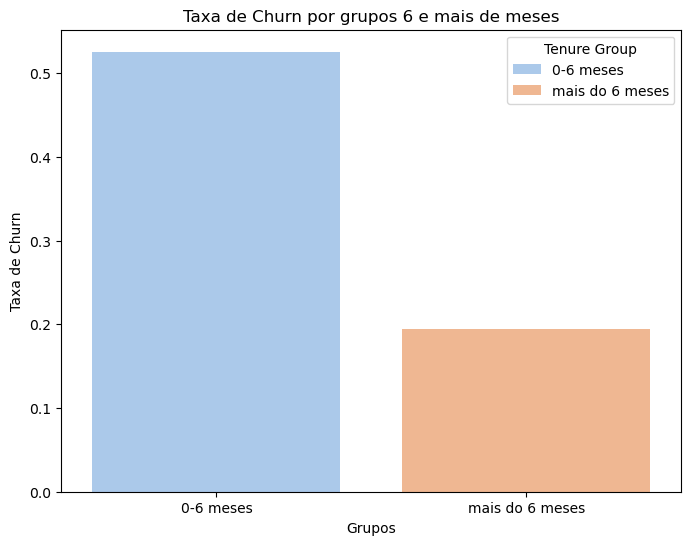

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df_rate_churn_group = rate_churn_per_group.reset_index()
df_rate_churn_group.columns=['Tenure Group', 'Churn Label Mean']

plt.figure(figsize=(8, 6))
sns.barplot(x='Tenure Group', y='Churn Label Mean', hue='Tenure Group', data=df_rate_churn_group, palette='pastel', legend=True)
plt.xlabel('Grupos')
plt.ylabel('Taxa de Churn')
plt.title('Taxa de Churn por grupos 6 e mais de meses')
plt.show()

In [9]:
phone_service_counts = train_churn['Phone Service'].value_counts()
multiple_lines_counts = train_churn['Multiple Lines'].value_counts()
internet_service_counts = train_churn['Internet Service'].value_counts()
online_security_counts = train_churn['Online Security'].value_counts()
online_backup_counts = train_churn['Online Backup'].value_counts()
device_protection_counts = train_churn['Device Protection'].value_counts()
tech_support_counts = train_churn['Tech Support'].value_counts()
streaming_tv_counts = train_churn['Streaming TV'].value_counts()
streaming_movies_counts = train_churn['Streaming Movies'].value_counts()

service_counts = {
    'Phone Service': phone_service_counts,
    'Multiple Lines': multiple_lines_counts,
    'Internet Service': internet_service_counts,
    'Online Security': online_security_counts,
    'Online Backup': online_backup_counts,
    'Device Protection': device_protection_counts,
    'Tech Support': tech_support_counts,
    'Streaming TV': streaming_tv_counts,
    'Streaming Movies': streaming_movies_counts
}

for service, counts in service_counts.items():
    no_counts = counts[counts.index == 'No']
    if not no_counts.empty:
        print(no_counts)

Phone Service
No    585
Name: count, dtype: int64
Multiple Lines
No    2894
Name: count, dtype: int64
Internet Service
No    1318
Name: count, dtype: int64
Online Security
No    2972
Name: count, dtype: int64
Online Backup
No    2624
Name: count, dtype: int64
Device Protection
No    2612
Name: count, dtype: int64
Tech Support
No    2925
Name: count, dtype: int64
Streaming TV
No    2394
Name: count, dtype: int64
Streaming Movies
No    2347
Name: count, dtype: int64


## Pre-Tratamento - Train

In [10]:
for col in train_churn.columns:
    if len(train_churn[col].value_counts()) > 2 and train_churn[col].dtypes == 'object':
        print(col, train_churn[col].unique())

CustomerID ['7590-VHVEG' '3038-PQIUY' '1468-DEFNC' ... '4804-NCPET' '2878-DHMIN'
 '7774-OJSXI']
City ['Los Angeles' 'Dulzura' 'San Jose' ... 'Fawnskin' 'Leggett' 'Korbel']
Lat Long ['33.973616, -118.24902' '32.622999, -116.687855' '37.277592, -121.986477'
 ... '40.7666, -123.80458' '37.834341, -122.26437'
 '33.766004, -117.786763']
Multiple Lines ['No phone service' 'Yes' 'No']
Internet Service ['DSL' 'No' 'Fiber optic']
Online Security ['No' 'Yes' 'No internet service']
Online Backup ['Yes' 'No internet service' 'No']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'No internet service' 'Yes']
Streaming TV ['No' 'No internet service' 'Yes']
Streaming Movies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'Two year' 'One year']
Payment Method ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']
Total Charges ['29.85' '2522.4' '1548.65' ... '387.4' '666' '3066.45']


In [11]:
## Dropando colunas que decidir nao usar
train_churn.drop('CustomerID', axis=1, inplace=True)
train_churn.drop('Count', axis=1, inplace=True)
train_churn.drop('Country', axis=1, inplace=True)
train_churn.drop('State', axis=1, inplace=True)
train_churn.drop('Zip Code', axis=1, inplace=True)
train_churn.drop('City', axis=1, inplace=True)
train_churn.drop('Lat Long', axis=1, inplace=True)
train_churn.drop('Tenure Group', axis=1, inplace=True)

for i in train_churn['Total Charges']:
    if i == ' ':
        print(i, 'nao pode esta aqui')
        
train_churn['Total Charges'] = train_churn['Total Charges'].replace(' ', np.nan)
moda_charges = train_churn['Total Charges'].mode()[0]
train_churn['Total Charges'] = train_churn['Total Charges'].fillna(moda_charges)
train_churn['Total Charges'] = train_churn['Total Charges'].astype(float)

  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui
  nao pode esta aqui


In [12]:
for col in train_churn.columns:
    if len(train_churn[col].value_counts()) > 1 and train_churn[col].dtypes == 'object':
        print(col, train_churn[col].unique())

Gender ['Female' 'Male']
Senior Citizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Phone Service ['No' 'Yes']
Multiple Lines ['No phone service' 'Yes' 'No']
Internet Service ['DSL' 'No' 'Fiber optic']
Online Security ['No' 'Yes' 'No internet service']
Online Backup ['Yes' 'No internet service' 'No']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'No internet service' 'Yes']
Streaming TV ['No' 'No internet service' 'Yes']
Streaming Movies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'Two year' 'One year']
Paperless Billing ['Yes' 'No']
Payment Method ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']


In [13]:
from sklearn.preprocessing import LabelEncoder


def encoding_df(df):
    
    for coluna in df.columns:
        if df[coluna].dtype == 'object':
    
            #dados binarios
            if len(df[coluna].value_counts()) == 2 and df[coluna].dtype == 'object':
                df[coluna] = df[coluna].replace({'Yes': 1, 'No': 0}).astype(int)
    
            #mais de 2 variaveis cartegoricas
            elif len(df[coluna].value_counts()) == 3 and df[coluna].dtype == 'object':
                if 'No internet service' in df[coluna].unique():
                    df[coluna] = df[coluna].replace({'Yes': 1, 'No': 0, 'No internet service': 3}).astype(int)
                elif 'No phone service' in df[coluna].unique():
                    df[coluna] = df[coluna].replace({'Yes': 1, 'No': 0, 'No phone service': 3}).astype(int)
                elif 'DSL' in df[coluna].unique():
                    df[coluna] = df[coluna].replace({'DSL': 1, 'No': 0, 'Fiber optic': 3}).astype(int)
        
    return df

def label_values(ds: pd.Series, dicio: dict) -> dict:
    index=1
    for key in ds.index:
        print(index)
        dicio[key] = index
        index+=1
    return dicio

filter_payment = train_churn['Payment Method'].value_counts()
map_payment = {}
map_payment = label_values(filter_payment, map_payment)

train_churn['Payment Method'] = train_churn['Payment Method'].map(map_payment)
train_churn['Gender'] = train_churn['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
train_churn['Contract'] = train_churn['Contract'].replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype(int)

train_encoding = encoding_df(train_churn)
train_encoding.head(10)

1
2
3
4


/tmp/ipykernel_96705/3419460459.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_churn['Gender'] = train_churn['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
/tmp/ipykernel_96705/3419460459.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_churn['Contract'] = train_churn['Contract'].replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype(int)
/tmp/ipykernel_96705/3419460459.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,33.973616,-118.249020,0,0,1,0,1,0,3,1,...,0,0,0,0,1,1,29.85,29.85,0,3964
1,32.622999,-116.687855,0,0,0,0,38,1,1,1,...,0,0,0,0,1,3,66.15,2522.40,0,4933
2,37.277592,-121.986477,1,1,1,1,64,1,1,0,...,3,3,3,2,1,3,24.40,1548.65,0,4772
3,34.017697,-118.200577,0,1,1,0,72,1,1,1,...,0,1,1,2,1,4,84.10,6129.65,0,4999
4,39.061227,-120.179546,0,1,0,0,42,1,1,3,...,0,1,0,0,1,1,84.65,3541.35,1,4871
5,34.983808,-117.239306,1,0,0,0,1,1,1,3,...,0,0,0,0,1,1,75.10,75.10,0,4120
6,38.398815,-122.861923,1,0,0,0,18,1,1,3,...,0,1,0,1,1,4,89.60,1633.00,0,2269
7,36.217864,-120.080117,1,0,1,1,68,1,1,3,...,0,0,0,1,1,3,85.50,5696.60,0,4380
8,36.298780,-119.201028,1,0,1,0,29,1,1,3,...,0,0,0,0,1,3,80.15,2265.25,1,5189
9,37.257063,-121.923037,1,0,1,1,14,1,1,1,...,0,0,1,0,0,2,69.20,944.65,0,2871


## Pre-Processamento Test

In [15]:
#Dropando colunas que nao vou usar

test_churn.drop('CustomerID', axis=1, inplace=True)
test_churn.drop('Count', axis=1, inplace=True)
test_churn.drop('Country', axis=1, inplace=True)
test_churn.drop('State', axis=1, inplace=True)
test_churn.drop('Zip Code', axis=1, inplace=True)
test_churn.drop('City', axis=1, inplace=True)
test_churn.drop('Lat Long', axis=1, inplace=True)



In [16]:
test_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           1057 non-null   float64
 1   Longitude          1057 non-null   float64
 2   Gender             1057 non-null   object 
 3   Senior Citizen     1057 non-null   object 
 4   Partner            1057 non-null   object 
 5   Dependents         1057 non-null   object 
 6   Tenure Months      1057 non-null   int64  
 7   Phone Service      1057 non-null   object 
 8   Multiple Lines     1057 non-null   object 
 9   Internet Service   1057 non-null   object 
 10  Online Security    1057 non-null   object 
 11  Online Backup      1057 non-null   object 
 12  Device Protection  1057 non-null   object 
 13  Tech Support       1057 non-null   object 
 14  Streaming TV       1057 non-null   object 
 15  Streaming Movies   1057 non-null   object 
 16  Contract           1057 

In [17]:
for col in test_churn.columns:
    if len(test_churn[col].value_counts()) > 2 and test_churn[col].dtypes == 'object':
        print(col, test_churn[col].unique())

Multiple Lines ['No' 'Yes' 'No phone service']
Internet Service ['Fiber optic' 'DSL' 'No']
Online Security ['No' 'No internet service' 'Yes']
Online Backup ['Yes' 'No internet service' 'No']
Device Protection ['No' 'No internet service' 'Yes']
Tech Support ['No' 'No internet service' 'Yes']
Streaming TV ['No' 'No internet service' 'Yes']
Streaming Movies ['Yes' 'No' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
Payment Method ['Bank transfer (automatic)' 'Credit card (automatic)' 'Mailed check'
 'Electronic check']


In [18]:
test_churn['Payment Method'] = test_churn['Payment Method'].map(map_payment)
test_churn['Gender'] = test_churn['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
test_churn['Contract'] = test_churn['Contract'].replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype(int)

test_enconding = encoding_df(test_churn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           1057 non-null   float64
 1   Longitude          1057 non-null   float64
 2   Gender             1057 non-null   int64  
 3   Senior Citizen     1057 non-null   int64  
 4   Partner            1057 non-null   int64  
 5   Dependents         1057 non-null   int64  
 6   Tenure Months      1057 non-null   int64  
 7   Phone Service      1057 non-null   int64  
 8   Multiple Lines     1057 non-null   int64  
 9   Internet Service   1057 non-null   int64  
 10  Online Security    1057 non-null   int64  
 11  Online Backup      1057 non-null   int64  
 12  Device Protection  1057 non-null   int64  
 13  Tech Support       1057 non-null   int64  
 14  Streaming TV       1057 non-null   int64  
 15  Streaming Movies   1057 non-null   int64  
 16  Contract           1057 

/tmp/ipykernel_96705/2824658635.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_churn['Gender'] = test_churn['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
/tmp/ipykernel_96705/2824658635.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_churn['Contract'] = test_churn['Contract'].replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}).astype(int)
/tmp/ipykernel_96705/3419460459.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

In [20]:
print(f"""
Minha coluna pre-tratada de treino ficou assim:
""")
print(train_encoding.info())

print('Minha tabela pre-tradata de teste ficou assim:')

print(test_enconding.info())


Minha coluna pre-tratada de treino ficou assim:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           5986 non-null   float64
 1   Longitude          5986 non-null   float64
 2   Gender             5986 non-null   int64  
 3   Senior Citizen     5986 non-null   int64  
 4   Partner            5986 non-null   int64  
 5   Dependents         5986 non-null   int64  
 6   Tenure Months      5986 non-null   int64  
 7   Phone Service      5986 non-null   int64  
 8   Multiple Lines     5986 non-null   int64  
 9   Internet Service   5986 non-null   int64  
 10  Online Security    5986 non-null   int64  
 11  Online Backup      5986 non-null   int64  
 12  Device Protection  5986 non-null   int64  
 13  Tech Support       5986 non-null   int64  
 14  Streaming TV       5986 non-null   int64  
 15  Streaming Movies   598

In [21]:
train_encoding.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV
0,33.973616,-118.249020,0,0,1,0,1,0,3,1,...,0,0,0,0,1,1,29.85,29.85,0,3964
1,32.622999,-116.687855,0,0,0,0,38,1,1,1,...,0,0,0,0,1,3,66.15,2522.40,0,4933
2,37.277592,-121.986477,1,1,1,1,64,1,1,0,...,3,3,3,2,1,3,24.40,1548.65,0,4772
3,34.017697,-118.200577,0,1,1,0,72,1,1,1,...,0,1,1,2,1,4,84.10,6129.65,0,4999
4,39.061227,-120.179546,0,1,0,0,42,1,1,3,...,0,1,0,0,1,1,84.65,3541.35,1,4871


## Compare os resultados obtidos entre uma árvore de decisão e uma floresta aleatória em termos de precisão na classificação de churn de clientes. Avalie também outras métricas relevantes, como recall e F1-score, para entender melhor a eficácia de cada modelo na previsão de churn.

- Pre-Processamento e teste de treina, Fiz o que foi pedido.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
decision = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier()

X = train_encoding.drop(columns=['Churn Label'])
y = train_encoding['Churn Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2022)

X_train_std = scaler.fit_transform(X_train)
x_test_std = scaler.transform(X_test)


decision.fit(X_train_std, y_train)
forest.fit(X_train_std, y_train)

y_decision = decision.predict(x_test_std)
y_forest = forest.predict(x_test_std)

t = ['0', '1']

print(classification_report(y_test, y_decision, target_names=t))
print(classification_report(y_test, y_forest, target_names=t))

precisao_forest = accuracy_score(y_test, y_forest)
precisao_desicion = accuracy_score(y_test, y_decision)

print('Precisao entre os dois modelos')
print('Random Forest:', precisao_forest)
print('Decision Tree:', precisao_desicion)


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       882
           1       0.52      0.52      0.52       316

    accuracy                           0.75      1198
   macro avg       0.67      0.67      0.67      1198
weighted avg       0.75      0.75      0.75      1198

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       882
           1       0.73      0.51      0.60       316

    accuracy                           0.82      1198
   macro avg       0.79      0.72      0.74      1198
weighted avg       0.81      0.82      0.81      1198

Precisao entre os dois modelos
Random Forest: 0.820534223706177
Decision Tree: 0.7454090150250418


## Demonstre o uso da validação cruzada para avaliar o desempenho de um modelo demachine learning. Inclua uma descrição dos tipos comuns de validação cruzada e como cada um pode ser aplicado para melhorar a generalização do modelo.